In [1]:
# install dependencies and download dataset
!git clone https://github.com/richa-singhx/BiomedParse
!pip install -r BiomedParse/assets/requirements/requirements.txt

Cloning into 'BiomedParse'...
remote: Enumerating objects: 859, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 859 (delta 72), reused 61 (delta 61), pack-reused 736 (from 2)
Receiving objects: 100% (859/859), 190.14 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (239/239), done.
Updating files: 100% (584/584), done.
Filtering content: 100% (45/45), 69.68 MiB | 2.99 MiB/s, done.
  Cloning https://github.com/MaureenZOU/detectron2-xyz.git to /tmp/pip-req-build-kn_7g30g
  Running command git clone --filter=blob:none --quiet https://github.com/MaureenZOU/detectron2-xyz.git /tmp/pip-req-build-kn_7g30g
  Resolved https://github.com/MaureenZOU/detectron2-xyz.git to commit 42121d75e10d9f858f3a91b6a39f5722c02868f0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/BiomedParse')
print(os.getcwd())

/content/BiomedParse


In [4]:
!pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-dhtr5s_n/detectron2_063251d8ecf34e4eb8b6155614381a26
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-dhtr5s_n/detectron2_063251d8ecf34e4eb8b6155614381a26
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.5-cp312-cp312-linux_x86_64.whl size=6701463 sha256=1dc635519a3b43f695de955736f859d2a5406ae4683e15c74120a2e27a248554
  Stored in directory: /tmp/pip-ephem-wheel-cache-_hyuo58n/wheels/16/b8/d1/ab1bde86b120f3871e5cfc7ecf8b5516baa01f28b3f30e7460
Successfully built detectron2
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:


In [5]:
!python3 -m pip install -U 'git+https://github.com/facebookresearch/detectron2.git@ff53992b1985b63bd3262b5a36167098e3dada02'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision ff53992b1985b63bd3262b5a36167098e3dada02) to /tmp/pip-req-build-v3cm7nwu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-v3cm7nwu
  Running command git rev-parse -q --verify 'sha^ff53992b1985b63bd3262b5a36167098e3dada02'
  Running command git fetch -q https://github.com/facebookresearch/detectron2.git ff53992b1985b63bd3262b5a36167098e3dada02
  Running command git checkout -q ff53992b1985b63bd3262b5a36167098e3dada02
  Resolved https://github.com/facebookresearch/detectron2.git to commit ff53992b1985b63bd3262b5a36167098e3dada02
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6764276 sha256=4e31cfd7f2a98cfadf496e2467e5730ffa0882277bd78ff3207e427ab4ef869b
  Stored in directory: /root/.cache/pip/wheels/9b/2b/1c/71ee2949aa633881ec4bf5f895175162e104a93d1915be1e67

In [6]:
from PIL import Image
import torch
import numpy as np
from modeling.BaseModel import BaseModel
from modeling import build_model
from utilities.distributed import init_distributed
from utilities.arguments import load_opt_from_config_files
from utilities.constants import BIOMED_CLASSES

from inference_utils.inference import interactive_infer_image
from inference_utils.output_processing import check_mask_stats
# P-value (adjusted) that the segmentation belongs to "nodule" in the CT-Chest class
# Lower p-value indicates it is likely the segmentation not belongs to the class. Recommended threshold is 0.05

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/content/BiomedParse/modeling/vision/encoder/ops/modules/ms_deform_attn.py:87: SyntaxWarning: invalid escape sequence '\s'
  :param input_flatten               (N, \sum_{l=0}^{L-1} H_l \cdot W_l, C)


Deformable Transformer Encoder is not available.


In [7]:
import huggingface_hub

HF_TOKEN = 'HF_TOKEN'

huggingface_hub.login(HF_TOKEN)

### Model Setup

In [9]:
# Build model config
opt = load_opt_from_config_files(["configs/biomedparse_inference.yaml"])
opt = init_distributed(opt)

# Load model from pretrained weights
pretrained_pth = 'hf_hub:microsoft/BiomedParse'

model = BaseModel(opt, build_model(opt)).from_pretrained(pretrained_pth).eval().cuda()
with torch.no_grad():
    model.model.sem_seg_head.predictor.lang_encoder.get_text_embeddings(BIOMED_CLASSES + ["background"], is_eval=True)

biomedparse_v1.pt:   0%|          | 0.00/1.80G [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

### Utility Functions

In [10]:
def plot_segmentation_masks(original_image, segmentation_masks, texts, rotate=0):
    ''' Plot a list of segmentation mask over an image.
    '''
    original_image = original_image[:, :, :3]
    fig, ax = plt.subplots(1, len(segmentation_masks) + 1, figsize=(10, 5))
    ax[0].imshow(np.rot90(original_image, rotate), cmap='gray')
    ax[0].set_title('Original Image')
    # grid off
    for a in ax:
        a.axis('off')

    for i, mask in enumerate(segmentation_masks):

        ax[i+1].set_title(texts[i])
        mask_temp = original_image.copy()
        mask_temp[mask > 0.5] = [255, 0, 0]
        mask_temp[mask <= 0.5] = [0, 0, 0, ]
        ax[i+1].imshow(np.rot90(mask_temp, rotate), alpha=0.9)
        ax[i+1].imshow(np.rot90(original_image, rotate), cmap='gray', alpha=0.5)


    plt.show()

In [11]:
!pip install pydicom nibabel SimpleITK

import json
import matplotlib.pyplot as plt

from inference_utils.processing_utils import read_nifti


def inference_nifti(file_path, text_prompts, is_CT, slice_idx, site=None, HW_index=(0, 1), channel_idx=None, rotate=0):
    image = read_nifti(file_path, is_CT, slice_idx, site=site,
                       HW_index=HW_index, channel_idx=channel_idx)

    pred_mask = interactive_infer_image(model, Image.fromarray(image), text_prompts)

    # Plot feature over image
    plot_segmentation_masks(image, pred_mask, text_prompts, rotate=rotate)

    return image, pred_mask


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 49.0 MB/s eta 0:00:00


### Ultrasound Example

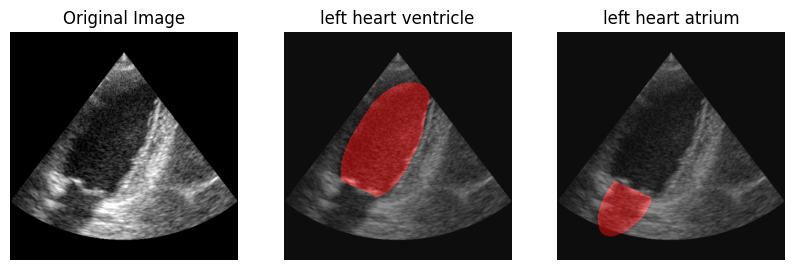

target_dist.json:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

left heart ventricle P-value: 0.3716228449242365
left heart atrium P-value: 0.4225888163830181


In [12]:
image_path = 'examples/patient0500_2CH_half_sequence.nii.gz'
text_prompt = ['left heart ventricle', 'left heart atrium']
slide_idx = 0

image, pred_mask = inference_nifti(image_path, text_prompt, is_CT=False, slice_idx=slide_idx, site=None, rotate=3)

for i in range(len(pred_mask)):
    adj_pvalue = check_mask_stats(image, pred_mask[i]*255, 'Ultrasound-Cardiac', text_prompt[i])
    print(f'{text_prompt[i]} P-value: {adj_pvalue}')

### MRI Example
#### T1-Gd

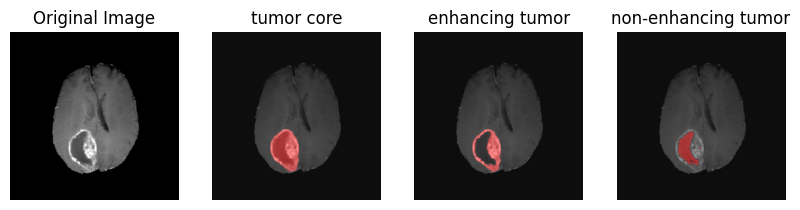

tumor core P-value: 0.30222800532318833
enhancing tumor P-value: 0.5358507056737561
non-enhancing tumor P-value: 0.07104603749552701


In [13]:
image_path = 'examples/BRATS_397.nii.gz'
text_prompt = ['tumor core', 'enhancing tumor', 'non-enhancing tumor']
slide_idx = 89

image, pred_mask =  inference_nifti(image_path, text_prompt, is_CT=False, slice_idx=slide_idx, site=None, channel_idx=2, rotate=1)

for i in range(len(pred_mask)):
    adj_pvalue = check_mask_stats(image, pred_mask[i]*255, 'MRI-T1-Gd-Brain', text_prompt[i])
    print(f'{text_prompt[i]} P-value: {adj_pvalue}')

#### FLAIR

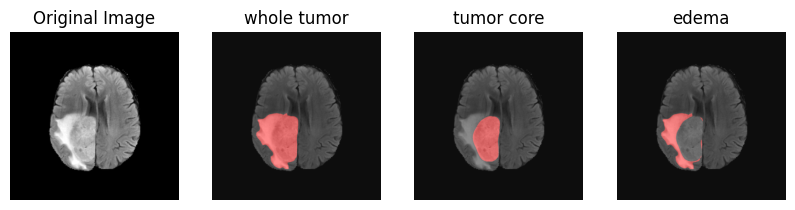

whole tumor P-value: 0.27884707346505494
tumor core P-value: 0.42529402410803857
edema P-value: 0.3021471223195892


In [14]:
image_path = 'examples/BRATS_422.nii.gz'
text_prompt = ['whole tumor', 'tumor core', 'edema']
slide_idx = 84

image, pred_mask =  inference_nifti(image_path, text_prompt, is_CT=False, slice_idx=slide_idx, site=None, channel_idx=0, rotate=1)

for i in range(len(pred_mask)):
    adj_pvalue = check_mask_stats(image, pred_mask[i]*255, 'MRI-FLAIR-Brain', text_prompt[i])
    print(f'{text_prompt[i]} P-value: {adj_pvalue}')

### CT Example

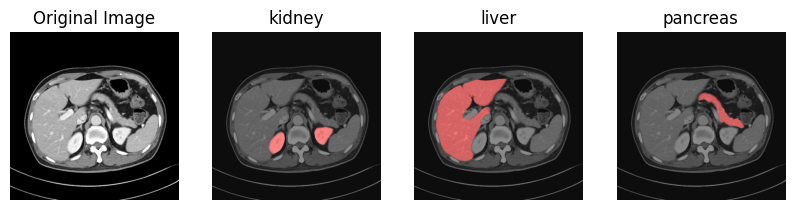

kidney P-value: 0.11329746221888574
liver P-value: 0.18575114303813348
pancreas P-value: 0.3313865968925472


In [15]:
image_path = 'examples/amos_0328.nii.gz'
text_prompt = ['kidney', 'liver', 'pancreas']
slide_idx = 68

image, pred_mask =  inference_nifti(image_path, text_prompt, is_CT=True, slice_idx=slide_idx, site='abdomen', rotate=1)

for i in range(len(pred_mask)):
    adj_pvalue = check_mask_stats(image, pred_mask[i]*255, 'CT-Abdomen', text_prompt[i])
    print(f'{text_prompt[i]} P-value: {adj_pvalue}')

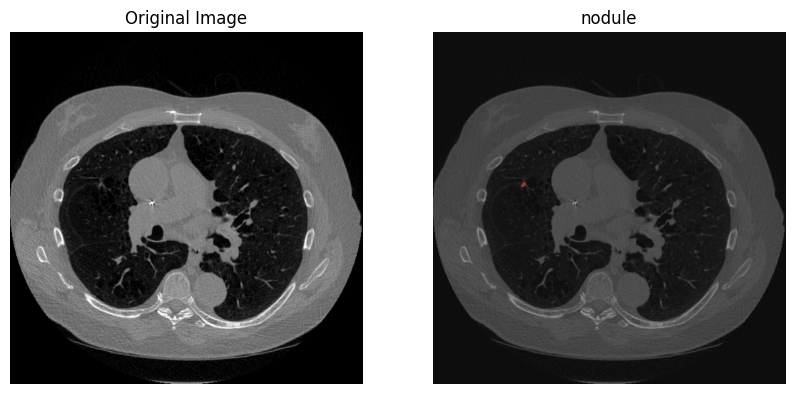

ValueError: Currently support targets for CT-Abdomen: ['postcava', 'aorta', 'right kidney', 'kidney', 'left kidney', 'duodenum', 'pancreas', 'liver (non abdomen window)', 'liver', 'spleen', 'stomach', 'gallbladder', 'left adrenal gland', 'adrenal gland', 'right adrenal gland', 'bladder', 'esophagus']

In [18]:
image_path = '/content/drive/MyDrive/DLCS/DLCS dataset/DLCS_0001.nii.gz'
text_prompt = ['nodule']
slide_idx = 320

image, pred_mask =  inference_nifti(image_path, text_prompt, is_CT=True, slice_idx=slide_idx, site='lung', rotate=1)

for i in range(len(pred_mask)):
    adj_pvalue = check_mask_stats(image, pred_mask[i]*255, 'CT-Abdomen', text_prompt[i])
    print(f'{text_prompt[i]} P-value: {adj_pvalue}')